<a href="https://colab.research.google.com/github/jacksontenorio8/image/blob/main/image_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
image_dir = os.getenv("IMAGE_DIR", "/content/drive/MyDrive/data/car")



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Carregar o modelo pré-treinado (ResNet50, sem a última camada para extração de características)
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Função para processar imagens e extrair características
def extract_features(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)
    features = model.predict(image_array)
    return features.flatten()

# Diretório com imagens para análise (pode ser alterado para o Google Drive
image_dir = "path/to/your/images"


# Lista para armazenar as características e os nomes dos arquivos das imagens
feature_list = []
file_names = []

94765736/94765736 [==============================] - 0s 0us/step


In [4]:
# Extração de características das imagens no diretório
for file in os.listdir(image_dir):
    if file.endswith(('jpg', 'png', 'jpeg')):
        file_path = os.path.join(image_dir, file)
        features = extract_features(file_path)
        feature_list.append(features)
        file_names.append(file)

# Convertendo a lista de características em um array do NumPy
feature_array = np.array(feature_list)

# Criação do modelo k-Nearest Neighbors para encontrar imagens similares
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(feature_array)

1/1 [==============================] - 0s 150ms/step


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 260ms/step


NearestNeighbors(metric='cosine')

In [5]:

# Função para recomendar imagens similares
def recommend_similar_images(query_image_path, num_results=5):
    query_features = extract_features(query_image_path)
    distances, indices = knn.kneighbors([query_features], n_neighbors=num_results)

    # Exibir a imagem de consulta
    query_image = load_img(query_image_path, target_size=(224, 224))
    plt.imshow(query_image)
    plt.title("Imagem de Consulta")
    plt.axis('off')
    plt.show()

    # Exibir imagens recomendadas
    print("Imagens Recomendadas:")
    for idx in indices[0]:
        recommended_image_path = os.path.join(image_dir, file_names[idx])
        recommended_image = load_img(recommended_image_path, target_size=(224, 224))
        plt.imshow(recommended_image)
        plt.axis('off')
        plt.show()



1/1 [==============================] - 0s 149ms/step


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


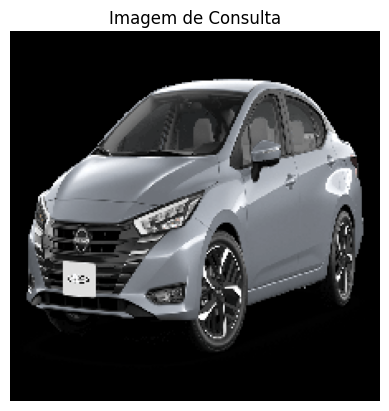

Imagens Recomendadas:


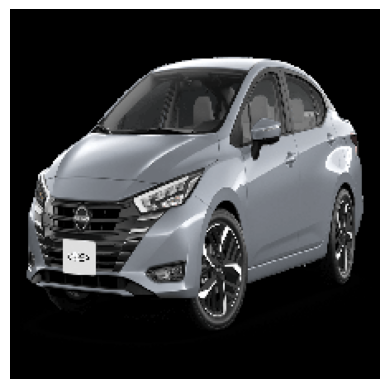

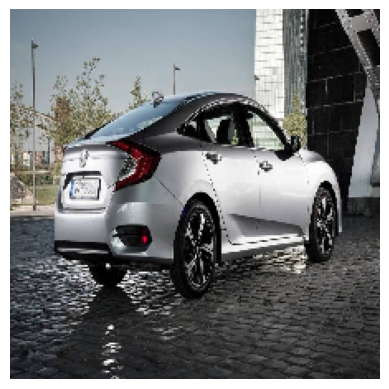

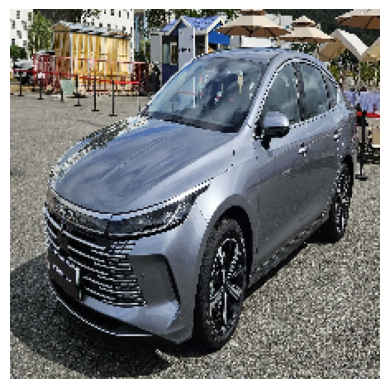

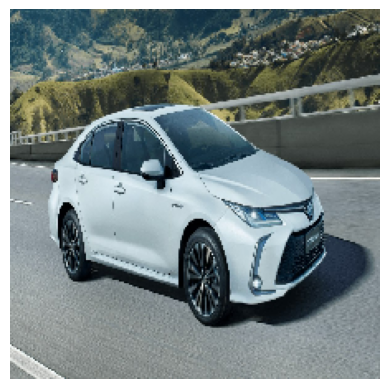

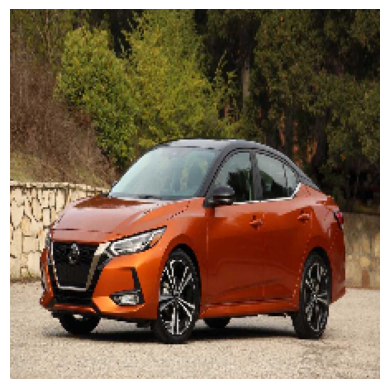

In [6]:
# Exemplo de uso (substitua pelo caminho da imagem de consulta)
query_image_path = "/content/drive/MyDrive/data/car/versa.png"
recommend_similar_images(query_image_path)
